/var/folders/7m/3rbdnx5n5sz625f3l87m91cc0000gn/T/ipykernel_75327/489495671.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = quadratic_function(X[i, j], Y[i, j], A, b, c)


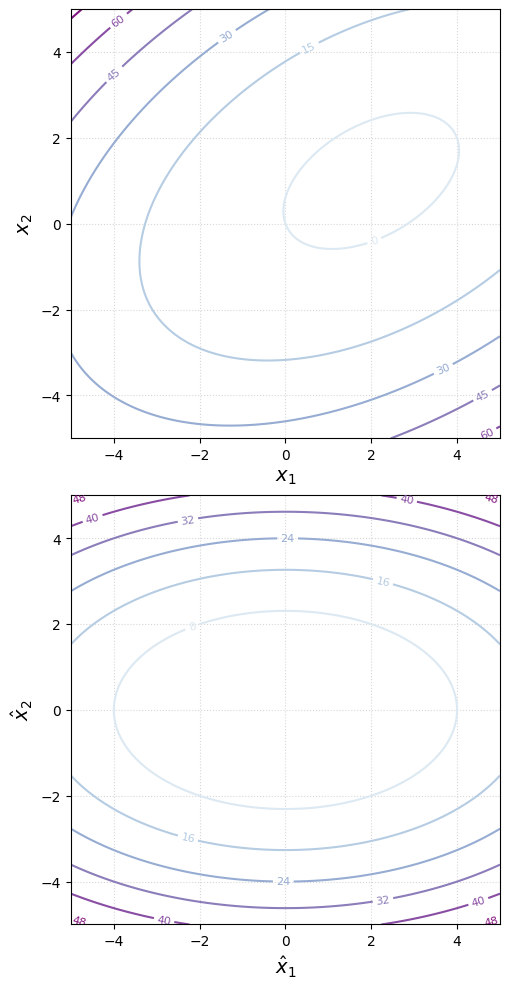

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
ylim = [-5, 5]
xlim = [-5, 5]
CONTOUR_LINES = 10
LABELS_FONTSIZE = 14
FIGSIZE = (6, 10)
CONTOUR_LOSS_THRESHOLD = 20

# Define the quadratic function
def quadratic_function(x, y, A, b, c=0):
    x_vec = np.vstack((x, y))
    return 0.5 * np.sum(x_vec * (A @ x_vec), axis=0) - np.dot(b.T, x_vec) + c

# Plot contours for the quadratic function using Matplotlib's default contour lines
def plotContours(ax, A, b, x_star=np.array([0, 0]), c=0):
    X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = np.zeros_like(X)
    
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = quadratic_function(X[i, j], Y[i, j], A, b, c)
    
    # Use Matplotlib's contour function
    CS = ax.contour(X, Y, Z, cmap="BuPu")
    ax.clabel(CS, inline=True, fontsize=8)

# Setup for two plots
fig, axes = plt.subplots(2, 1, figsize=FIGSIZE)
plt.tight_layout(pad=2)
axes = np.ravel(axes)

for ax in axes:
    ax.set_aspect('equal', adjustable='box')
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.grid(zorder=0, alpha=0.5, linestyle=":")
    ax.set_xlabel(r"$x_1$", fontsize=LABELS_FONTSIZE)
    ax.set_ylabel(r"$x_2$", fontsize=LABELS_FONTSIZE)

axes[1].set_xlabel(r"$\hat{x}_1$", fontsize=LABELS_FONTSIZE)
axes[1].set_ylabel(r"$\hat{x}_2$", fontsize=LABELS_FONTSIZE)

# Define A, b, and c for both functions
theta = np.radians(30)
Q = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
Lambda = np.diag([1, 3])
A1 = np.dot(Q, np.dot(Lambda, Q.T))
b1 = np.dot(A1, np.array([2, 1]))  # Ensures minimum at x* = (2, 1)

A2 = Lambda  # Example matrix for the second function, already centered at origin
b2 = np.array([0, 0])  # Minimum at origin

# Plotting
plotContours(axes[0], A1, b1)
plotContours(axes[1], A2, b2)

plt.savefig("coordinate_shift.pdf")
plt.show()